In [ ]:
%run evaluate.py
ret3 = ae_train("../../../data/signal/base_3/*.h5", "../../../data/background/base_3/*.h5", 9)

found 0 matches with search '/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/autoencode/data/summary/hlf_eflow3_9_v*'
found 0 matches with search '/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/autoencode/data/summary/hlf_eflow3_9_v0'
h5_elt 'metric_names' :: creating group 'data' in file 'hlf_eflow3_9_v0.h5'
h5_elt 'metric_names' :: creating dataset 'data/metric_names' in file 'hlf_eflow3_9_v0.h5'
h5_elt 'training' :: creating group 'params' in file 'hlf_eflow3_9_v0.h5'
h5_elt 'training' :: creating dataset 'params/training' in file 'hlf_eflow3_9_v0.h5'
h5_elt 'config' :: creating dataset 'params/config' in file 'hlf_eflow3_9_v0.h5'
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (InputLayer)         (None, 19)                0         
_________________________________________________________________
encoder (Model)              (None, 9)       

In [15]:
%run evaluate.py
e = ae_evaluation("hlf_eflow3_4_v2")

found 1 matches with search '/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/autoencode/data/summary/hlf_eflow3_4_v2.summary'
h5_elt 'metric_names' :: loading dataset 'data/metric_names' from file 'hlf_eflow3_4_v2.h5'
h5_elt 'training' :: loading dataset 'params/training' from file 'hlf_eflow3_4_v2.h5'
h5_elt 'config' :: loading dataset 'params/config' from file 'hlf_eflow3_4_v2.h5'
h5_elt 'loss' :: loading dataset 'metric_names/loss' from file 'hlf_eflow3_4_v2.h5'
h5_elt 'lr' :: loading dataset 'metric_names/lr' from file 'hlf_eflow3_4_v2.h5'
h5_elt 'val_loss' :: loading dataset 'metric_names/val_loss' from file 'hlf_eflow3_4_v2.h5'
train_shell :: using saved model


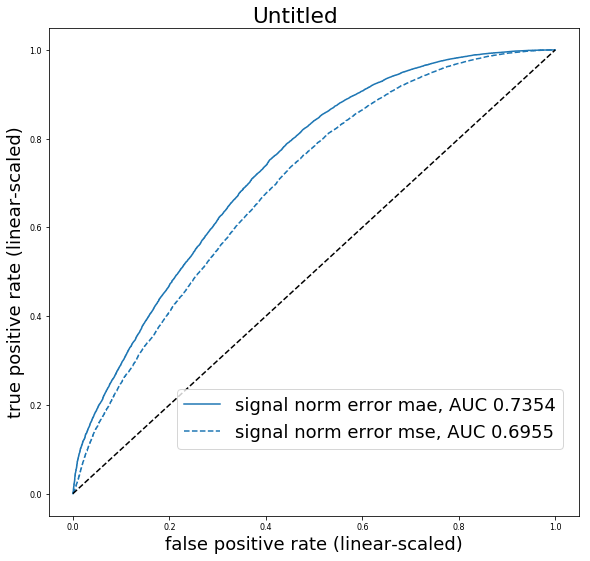

In [60]:
len(filter(lambda x: "eflow" in x, ret3.qcd.columns)) + 1, len(filter(lambda x: "eflow" in x, ret4.qcd.columns)) + 1

(36, 13)

In [25]:
import glob

background_path = glob.glob("../../../data/background/*.h5")
signal_path = glob.glob("../../../data/signal/*.h5")

db = data_loader("background")
for f in background_path:
    db.add_sample(f)

ds = data_loader("signal")
for f in signal_path:
    ds.add_sample(f)

data_loader :: Adding sample at path '/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/data/background/data_8_data.h5'
data_loader :: Adding sample at path '/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/data/background/data_6_data.h5'
data_loader :: Adding sample at path '/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/data/background/data_7_data.h5'
data_loader :: Adding sample at path '/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/data/background/data_0_data.h5'
data_loader :: Adding sample at path '/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/data/background/data_3_data.h5'
data_loader :: Adding sample at path '/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/data/background/data_2_data.h5'
data_loader :: Adding sample at path '/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/data/background/data_5_data.h5'
data_l

In [138]:
ef_bg = db.make_table('jet_eflow_variables', 'stack')
jf_bg = db.make_table('jet_features', 'stack')

ef_sg = ds.make_table('jet_eflow_variables', 'stack')
jf_sg = ds.make_table('jet_features', 'stack')

In [172]:
instance.remove(True)

train_shell :: removed associated data files for self!


In [173]:
import autoencodeSVJ.models as models
import autoencodeSVJ.trainer as trainer

seed = 42
data = ef_bg.cdrop(0)
signal = ef_sg.cdrop(0)

data.name = "data"
signal.name = "signal"

target_dim = 4
input_dim = len(data.columns)
test_split = 0.2
eval_split = 0.2
interm_layers = 0

norm_args = {
    "norm_type": "StandardScaler"
}

input_data, test_data = data.train_test_split(test_split, seed)
train_data, eval_data = input_data.train_test_split(eval_split, seed)

train_norm = train_data.norm(**norm_args)
eval_norm = train_data.norm(eval_data, **norm_args)
test_norm = test_data.norm(**norm_args)
signal_norm = signal.norm(**norm_args)

signal_norm.name = "signal norm"
eval_norm.name = "background norm"

instance = trainer.trainer("test")
aes = models.base_autoencoder()
aes.add(input_dim)
aes.add(30, activation='relu')
aes.add(target_dim, activation='relu')
aes.add(30, activation='relu')
aes.add(input_dim, activation='linear')
ae = aes.build()
ae.summary()

h5_elt 'metric_names' :: creating group 'data' in file 'test.h5'
h5_elt 'metric_names' :: creating dataset 'data/metric_names' in file 'test.h5'
h5_elt 'training' :: creating group 'params' in file 'test.h5'
h5_elt 'training' :: creating dataset 'params/training' in file 'test.h5'
h5_elt 'config' :: creating dataset 'params/config' in file 'test.h5'
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (InputLayer)         (None, 12)                0         
_________________________________________________________________
encoder (Model)              (None, 2)                 452       
_________________________________________________________________
decoder (Model)              (None, 12)                462       
Total params: 914
Trainable params: 914
Non-trainable params: 0
_________________________________________________________________


In [180]:
ae = instance.train(
    x_train=train_norm.data,
    x_test=eval_norm.data,
    y_train=train_norm.data,
    y_test=eval_norm.data,
    batch_size=128,
    loss='mse',
    model=ae,
    optimizer='adam',
    force=True,
    epochs=10,
    use_callbacks=True,
    learning_rate=0.001
)

train_shell :: using model passed as function argument
Train on 66185 samples, validate on 16547 samples
Epoch 41/50
66185/66185 [==============================] - 3s 39us/step - loss: 0.0037 - val_loss: 0.0035
Epoch 42/50
66185/66185 [==============================] - 1s 18us/step - loss: 0.0037 - val_loss: 0.0036
Epoch 43/50
66185/66185 [==============================] - 1s 20us/step - loss: 0.0037 - val_loss: 0.0034
Epoch 44/50
66185/66185 [==============================] - 1s 19us/step - loss: 0.0036 - val_loss: 0.0035
Epoch 45/50
66185/66185 [==============================] - 1s 19us/step - loss: 0.0037 - val_loss: 0.0036
Epoch 46/50
66185/66185 [==============================] - 1s 20us/step - loss: 0.0036 - val_loss: 0.0034
Epoch 47/50
66185/66185 [==============================] - 1s 19us/step - loss: 0.0036 - val_loss: 0.0036
Epoch 48/50
66185/66185 [==============================] - 1s 21us/step - loss: 0.0036 - val_loss: 0.0035
Epoch 49/50
66185/66185 [======================

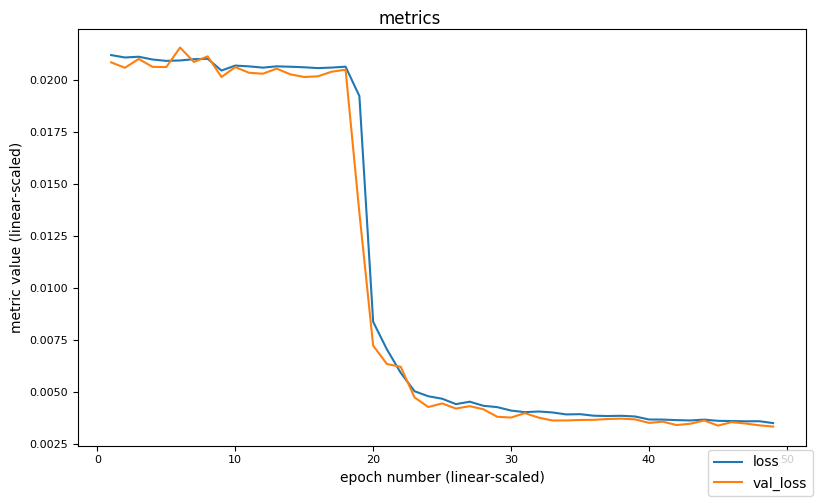

In [182]:
instance.plot_metrics(figsize=(8,5), figname="metrics", yscale='linear')

In [183]:
[data_err, signal_err], [data_recon, signal_recon] = get_recon_errors([test_norm, signal_norm], ae)

data_reps = data_table(ae.layers[1].predict(test_norm.data), name='background reps')
signal_reps = data_table(ae.layers[1].predict(signal_norm.data), name='signal reps')

data_table :: plotting distrubution(s) for table(s) ['background reps', 'signal reps']


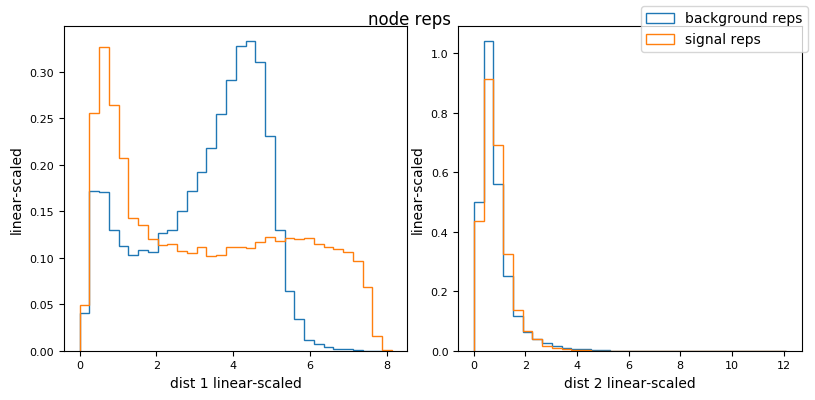

In [190]:
data_reps.plot(signal_reps, alpha=1, normed=1, figname='node reps', figsize=8, figloc='upper right')

data_table :: plotting distrubution(s) for table(s) ["'test' normed to 'test' error", 'signal norm error']


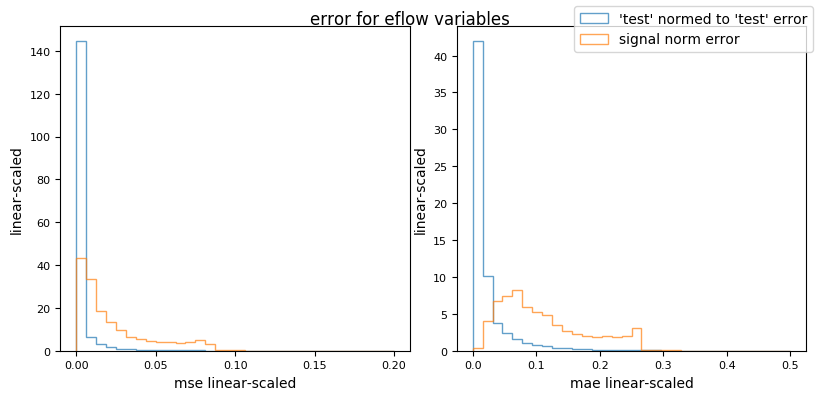

In [197]:
data_err.plot(signal_err, figsize=8, normed=1, figname='error for eflow variables', yscale='linear', rng=((0, 0.2), (0, 0.5)), figloc="upper right")

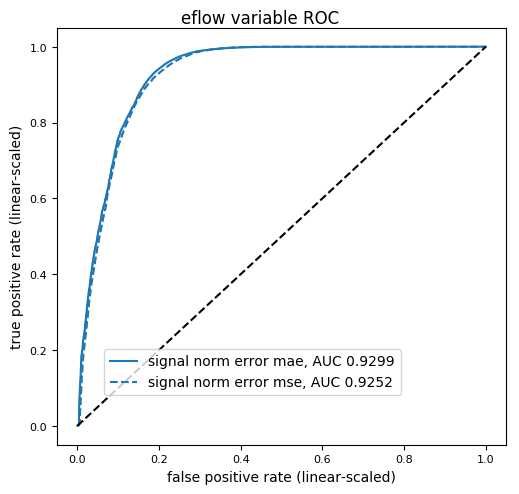

In [186]:
roc_auc_plot(data_err, signal_err, metrics=['mae', 'mse'], figsize=5, figname='eflow variable ROC', figloc=(0.2, 0.2))

data_table :: plotting distrubution(s) for table(s) ['background', 'signal']


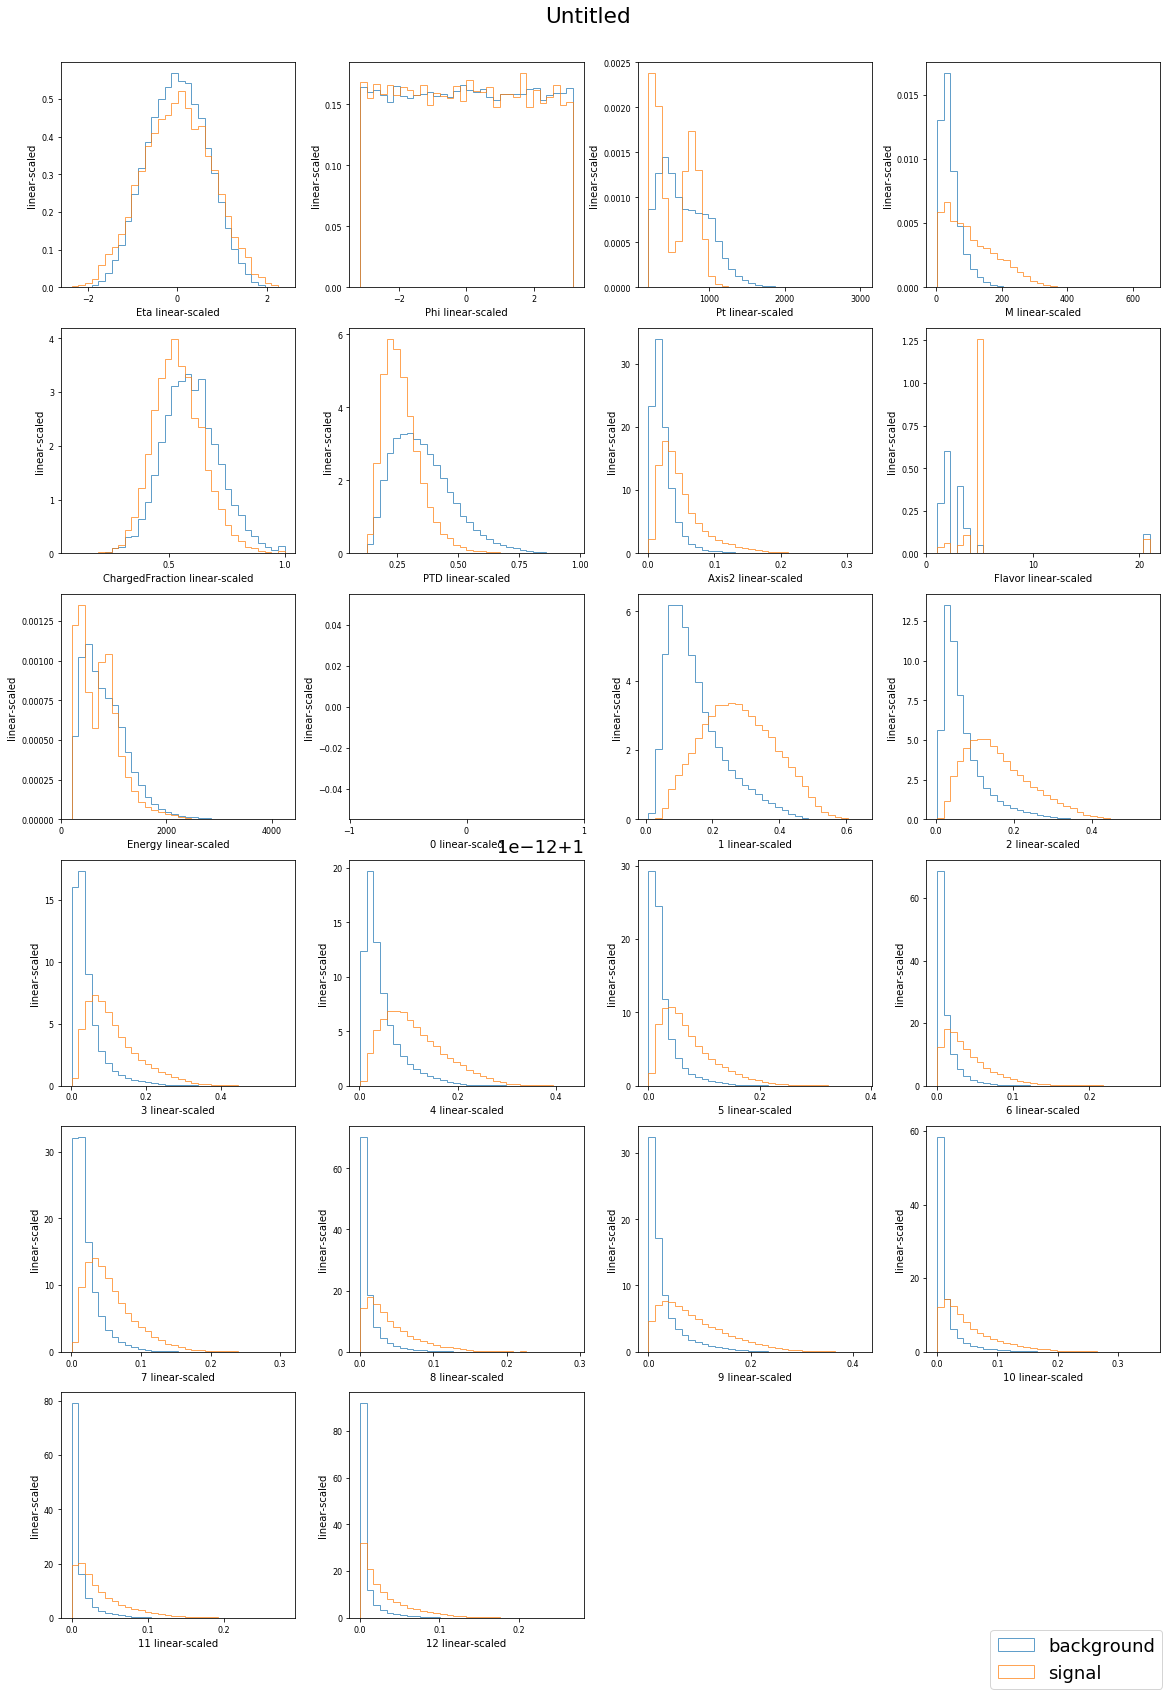

In [44]:
# background[0].plot(background[1:] + signal, normed=1)
background.plot(signal, normed=1)

In [13]:
ef_bg.merge(jf_bg, "sample")

,0,1,2,3,4,5,6,7,8,9,...,12,Eta,Phi,Pt,M,ChargedFraction,PTD,Axis2,Flavor,Energy
0,1.0,0.083108,0.028514,0.014978,0.017201,0.008451,0.002529,0.007636,0.002088,0.006907,...,0.000574,1.377481,2.284493,983.054626,53.008221,0.575000,0.420056,0.008870,2.0,2073.503751
1,1.0,0.147891,0.053704,0.028659,0.036218,0.017496,0.008292,0.015061,0.007076,0.021872,...,0.003235,0.245052,-0.878182,328.459961,24.373333,0.653846,0.286822,0.026968,3.0,339.248199
2,1.0,0.151244,0.053707,0.027554,0.036630,0.017044,0.008482,0.014620,0.007250,0.022875,...,0.003460,0.826187,1.015745,971.094177,83.489586,0.555556,0.256217,0.027090,2.0,1324.442075
3,1.0,0.131962,0.057516,0.036260,0.035924,0.021190,0.007924,0.018666,0.006651,0.017414,...,0.002298,0.255448,-2.096029,621.044861,35.924423,0.437500,0.470018,0.016066,21.0,642.423275
4,1.0,0.046888,0.009389,0.004995,0.005570,0.002688,0.000521,0.002517,0.000403,0.002198,...,0.000103,-1.103548,-1.045223,724.667175,21.671366,0.454545,0.431140,0.012036,2.0,1212.755930
5,1.0,0.079993,0.032693,0.018387,0.019035,0.010234,0.002688,0.009332,0.002255,0.006399,...,0.000512,-0.338546,2.436102,477.785065,23.540831,0.687500,0.395787,0.013025,2.0,505.975820
6,1.0,0.089544,0.022172,0.010802,0.014452,0.006233,0.002206,0.005585,0.001800,0.008018,...,0.000718,0.489517,0.673364,1071.369507,63.265865,0.509804,0.332984,0.015724,2.0,1203.981068
7,1.0,0.171871,0.068031,0.040865,0.045532,0.024884,0.011798,0.021143,0.010196,0.029540,...,0.005077,-0.250131,-2.426233,473.220490,43.653603,0.560000,0.401505,0.027521,2.0,490.049691
8,1.0,0.153118,0.061668,0.034090,0.040422,0.020497,0.008938,0.017496,0.008039,0.023445,...,0.003590,-0.461140,0.225560,760.429199,46.209953,0.555556,0.241844,0.028107,3.0,843.990801
9,1.0,0.095476,0.045541,0.028734,0.026617,0.016140,0.004559,0.014638,0.003782,0.009116,...,0.000870,0.474340,2.982440,450.606079,20.459534,0.631579,0.387534,0.017215,2.0,502.673076


data_table :: plotting distrubution(s) for table(s) ['background', 'signal']


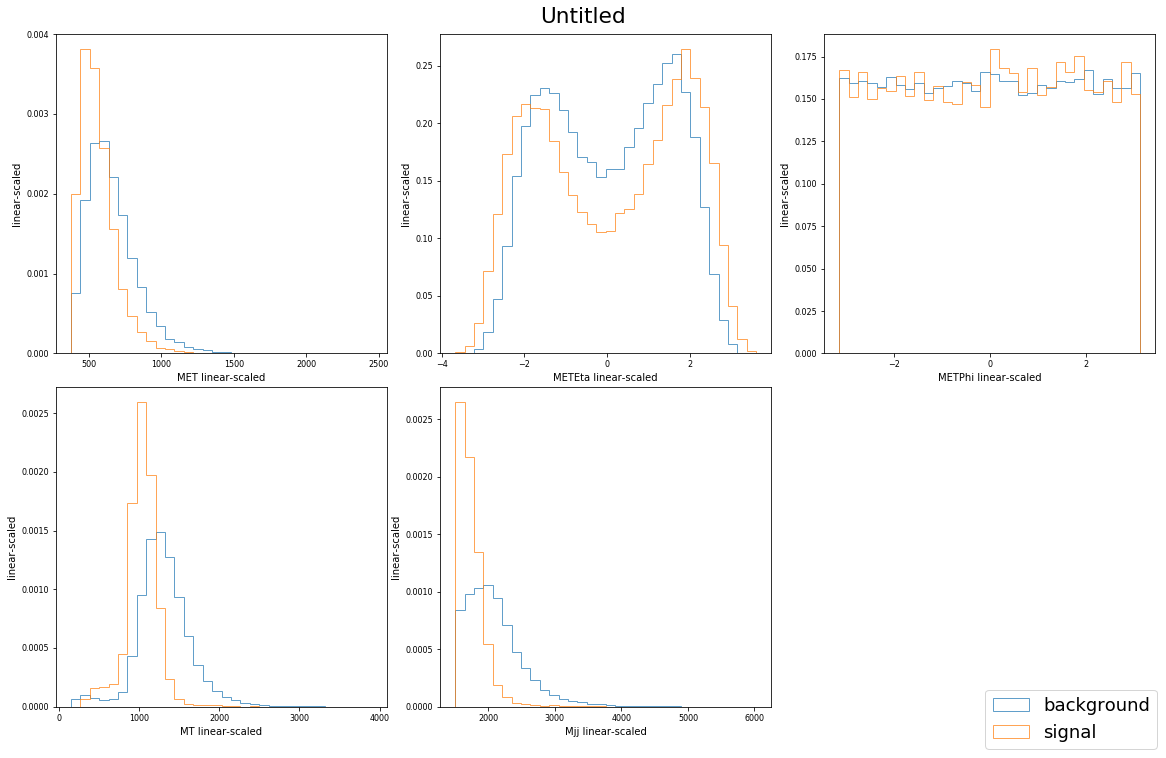

In [46]:
# d.stack_data(d.data['jet_features'], axis=0).shape

db.make_table('event_features').plot(ds.make_table('event_features'), normed=1, cols=3)

In [28]:
d.data['jet_features'].shape

(13, 2, 9)

In [22]:
d.sample_keys


{u'event_features', u'jet_eflow_variables', u'jet_features'}

((70, 8), (70, 8))

In [113]:
# def split_as_jets(data, jet_axis=1):
import autoencodeSVJ.utils as utils
    
def table_from_h5(handle, split_axis=1, minf=0, maxf=-1):
    
    name = handle.name.strip('/').strip('\\')
    data = np.asarray(handle['data'])
    labels = np.asarray(handle['labels'])
    
    if maxf < 0:
        maxf = None
    
    empty = slice(None,None)
    slc = slice(minf, maxf)
    
    print data.shape
    print labels.shape
    
    if len(data.shape) == 3:
        
        data = data[(empty, empty, slc)]
        labels = labels[slc]

        labels = jet_stack_labels(labels, data.shape[split_axis])
        data = jet_stack_data(data, split_axis)
        
    elif len(data.shape) > 3:
        raise Exception("data is of shape {}, too high of a dimension".format(data.shape))
    
    else:
        data = data[(empty, slc)]
        labels = labels[slc]
        
    return utils.data_table(data, headers=labels, name=name)
    
def jet_stack_data(data, jet_axis=1):
    return np.hstack(np.asarray(np.split(data, data.shape[jet_axis], axis=jet_axis)).squeeze())

def jet_stack_labels(labels, split_n):
    new = []
    for j in range(split_n):
        for l in labels:
            new.append("jet{}_{}".format(j, l))
    
    return new


In [124]:
import pandas as pd

# with h5py.File("test.h5") as f:
#     dfb = table_from_h5(f['jet_eflow_variables'])
#     f.close()

# with h5py.File("signal.h5") as f:
#     dfs = table_from_h5(f['jet_eflow_variables'])
#     f.close()
    
# with h5py.File("signal_check.h5") as f:
#     dfsc = table_from_h5(f['jet_eflow_variables'])
#     f.close()

with h5py.File("test.h5") as f:
    b = np.asarray(f['jet_eflow_variables']['data'])
    f.close()

with h5py.File("signal.h5") as f:
    s = np.asarray(f['jet_eflow_variables']['data'])
    f.close()
    
with h5py.File("signal_check.h5") as f:
    sc = np.asarray(f['jet_eflow_variables']['data'])
    f.close()
    

# eflow = core.energy_flow_bases[:,:,1:5]

# stacked = np.hstack([eflow[:,i,:] for i in range(eflow.shape[1])])

# stacked_names = ["j{}_v{}".format(i / eflow.shape[2], i % eflow.shape[2]) for i in range(stacked.shape[-1])]
# data = pd.DataFrame(np.hstack([core.event_features, stacked]), columns=core.event_feature_names + )

# # eflow = pd.DataFrame(eflow)

In [131]:
(s[:,:,:13] == sc).all(axis=0)

array([[ True,  True,  True,  True, False, False, False, False, False,
        False, False, False, False],
       [ True,  True,  True,  True, False, False, False, False, False,
        False, False, False, False]], dtype=bool)

In [122]:
dfsc.head()

,jet0_0,jet0_1,jet0_2,jet0_3,jet0_4,jet0_5,jet0_6,jet0_7,jet0_8,jet0_9,...,jet1_3,jet1_4,jet1_5,jet1_6,jet1_7,jet1_8,jet1_9,jet1_10,jet1_11,jet1_12
0,1.0,0.130617,0.029199,0.008362,0.020560,0.005274,0.002937,0.004119,0.003023,0.017061,...,0.010755,0.018765,0.006576,0.003127,0.005679,0.002644,0.011152,0.002953,0.001982,0.001178
1,1.0,0.237090,0.103066,0.049645,0.065223,0.029054,0.011060,0.020606,0.016298,0.056212,...,0.017203,0.029634,0.010460,0.004794,0.008334,0.005029,0.020481,0.006517,0.004241,0.002931
2,1.0,0.221522,0.101020,0.049551,0.059068,0.027645,0.007546,0.018610,0.013865,0.049072,...,0.069544,0.084695,0.041867,0.018414,0.030040,0.024384,0.073551,0.034942,0.022969,0.019947
3,1.0,0.178333,0.059396,0.023858,0.040786,0.014993,0.007876,0.011700,0.008265,0.031803,...,0.009146,0.016840,0.005514,0.002412,0.004714,0.002176,0.009859,0.002577,0.001672,0.000979
4,1.0,0.167272,0.051880,0.018062,0.032545,0.010618,0.004165,0.007462,0.005860,0.027980,...,0.011523,0.016886,0.006723,0.002499,0.005931,0.002097,0.007718,0.002385,0.001483,0.000678


data_table :: plotting distrubution(s) for table(s) [u'jet_eflow_variables', u'jet_eflow_variables', u'jet_eflow_variables']


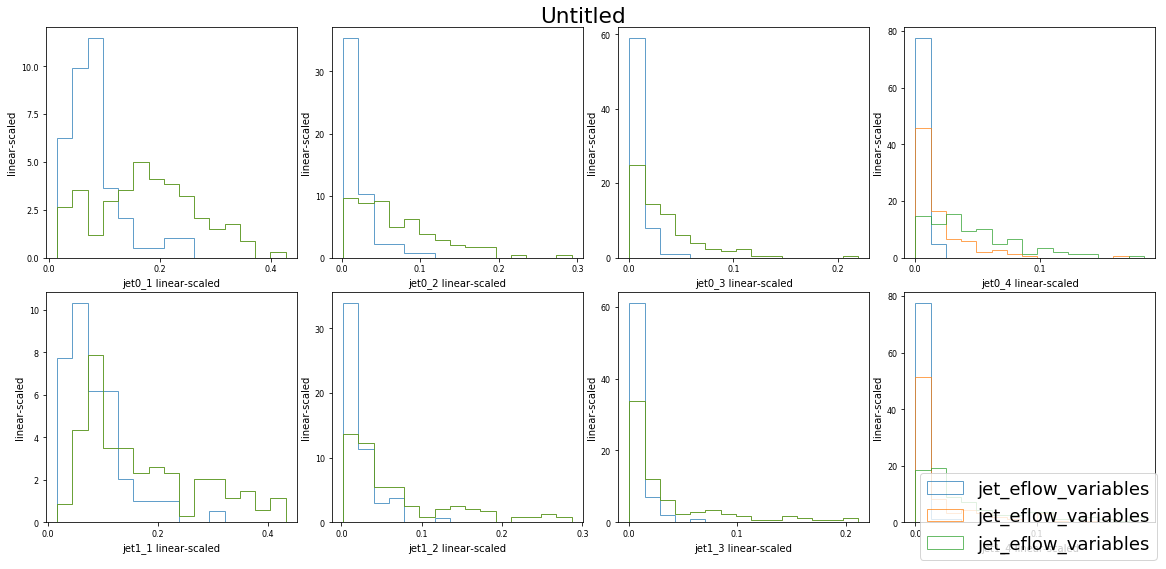

In [111]:
dfb.plot([dfs, dfsc], cols=4, normed=1, bins=15)

,jet0_1,jet0_2,jet0_3,jet0_4,jet1_1,jet1_2,jet1_3,jet1_4
0,True,True,True,False,True,True,True,False
1,True,True,True,False,True,True,True,False
2,True,True,True,False,True,True,True,False
3,True,True,True,False,True,True,True,False
4,True,True,True,False,True,True,True,False


In [104]:
dfs.shape, dfb.shape

((124, 8), (70, 8))

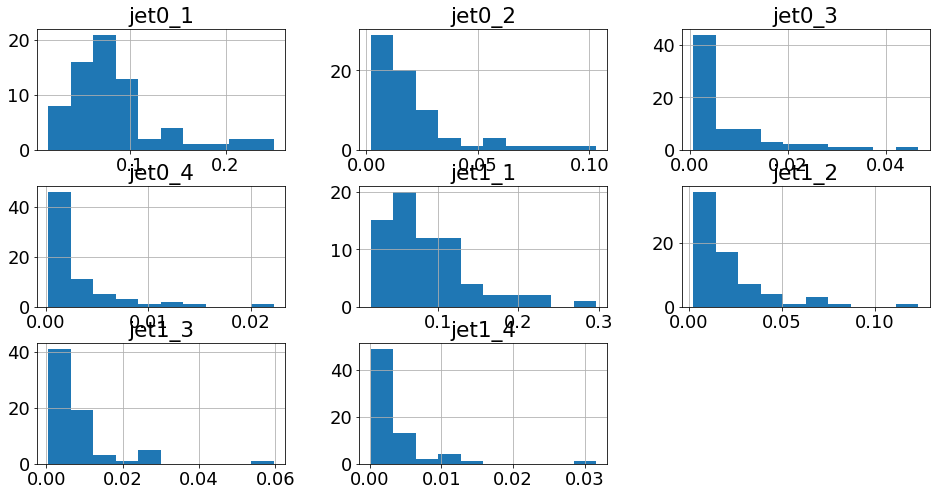

In [89]:
import matplotlib.pyplot as plt
plt.show()

In [35]:
df

,jet0_0,jet0_1,jet0_2,jet0_3,jet0_4,jet0_5,jet0_6,jet0_7,jet0_8,jet0_9,...,jet1_92,jet1_93,jet1_94,jet1_95,jet1_96,jet1_97,jet1_98,jet1_99,jet1_100,jet1_101
0,1.0,0.041169,0.006268,0.001952,0.000766,0.000328,0.003821,0.001082,0.000416,0.000392,...,0.000008,0.000012,0.000005,0.000027,0.000010,0.000004,0.000005,0.000005,3.141272e-06,1.925400e-06
1,1.0,0.096067,0.027455,0.011321,0.005178,0.002459,0.017038,0.006385,0.002847,0.002650,...,0.000005,0.000008,0.000002,0.000006,0.000007,0.000001,0.000003,0.000002,9.891236e-07,3.209952e-07
2,1.0,0.114905,0.029091,0.009251,0.003228,0.001206,0.018610,0.005408,0.001832,0.001675,...,0.000036,0.000040,0.000010,0.000059,0.000033,0.000013,0.000021,0.000018,1.040920e-05,5.191584e-06
3,1.0,0.134810,0.036358,0.012015,0.004537,0.001922,0.024815,0.007525,0.002718,0.002455,...,0.000187,0.000216,0.000105,0.000317,0.000183,0.000094,0.000123,0.000110,7.205381e-05,4.228902e-05


In [194]:
np.asarray([["j{}_var{}".format(i,j) for j in range(eflow.shape[2])] for i in range(eflow.shape[1])])

array([['j0_var0', 'j0_var1', 'j0_var2', 'j0_var3'],
       ['j1_var0', 'j1_var1', 'j1_var2', 'j1_var3']],
      dtype='|S7')

In [108]:
jet1,jet2 = map(pd.DataFrame, [core.energy_flow_bases[:,0,1:5], core.energy_flow_bases[:,1,1:5]])

In [118]:
this = pd.DataFrame(core.jet_constituents[0][0])


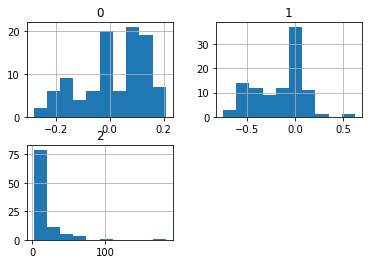

In [119]:
this.hist()
plt.show()

In [ ]:
core.selections

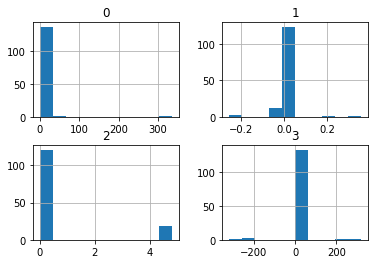

In [197]:
pd.DataFrame(other).hist()
plt.show()

In [147]:
thisjet = core.jet_constituents[0][0]
print np.roll(thisjet, 1, axis=1)[0], thisjet[0]

[  1.83873215e+02  -1.79724097e-02  -5.94997406e-03] [ -1.79724097e-02  -5.94997406e-03   1.83873215e+02]


In [200]:
tree = core.trees[0]

In [244]:
for i,elt in enumerate(tree.EFlowPhoton):
    p4 = elt.P4()
    print p4.Rapidity(), p4.M()

-4.88759374619 0.0
-4.9601855278 3.37174788087e-07
-4.9335770607 2.38418579102e-07
-4.86191129684 4.76837158203e-07
-4.76618289947 1.19209289551e-07
-4.86214399338 0.0
-4.8616476059 0.0
-4.97191524506 0.0
-4.94692802429 0.0
-4.94777536392 5.96046447754e-08
-4.80358695984 0.0
-4.73524045944 6.74349576174e-07
-4.86405611038 8.42936970218e-08
-4.60199832916 0.0
-4.52630853653 1.68587394044e-07
-4.53523015976 0.0
-4.53292560577 0.0
-4.58504247665 -6.74349576174e-07
-4.58408498764 0.0
-4.612200737 -1.19209289551e-07
-4.67565727234 -6.74349576174e-07
-4.5435552597 4.21468485109e-08
-4.57067251205 0.0
-4.615234375 0.0
-4.39384031296 8.42936970218e-08
-4.41113424301 -1.19209289551e-07
-4.39543056488 0.0
-4.47160196304 0.0
-4.4430565834 0.0
-4.37011766434 0.0
-4.4681520462 0.0
-4.38421487808 -8.42936970218e-08
-4.35866069794 0.0
-4.50695991516 5.96046447754e-08
-4.51763963699 -1.19209289551e-07
-4.30359697342 4.76837158203e-07
-4.34687709808 -5.96046447754e-08
-4.31053209305 0.0
-4.3417339325 -

In [248]:
jet = tree.Jet[0]

In [252]:
rt.ExRootTreeReader()

In [304]:
pt = rt.TLorentzVector()
pt.SetPxPyPzE(0,0,0,0)
for i in range(jet.Particles.GetEntriesFast()):
    obj = jet.Constituents[i]
    
    try:
        pt += obj.P4()
    except:
        print obj, "rejected"
    

<ROOT.TObject object at 0x(nil)> rejected
<ROOT.TObject object at 0x(nil)> rejected
<ROOT.TObject object at 0x(nil)> rejected
<ROOT.TObject object at 0x(nil)> rejected
<ROOT.TObject object at 0x(nil)> rejected
<ROOT.TObject object at 0x(nil)> rejected
<ROOT.TObject object at 0x(nil)> rejected
<ROOT.TObject object at 0x(nil)> rejected
<ROOT.TObject object at 0x(nil)> rejected
<ROOT.TObject object at 0x(nil)> rejected
<ROOT.TObject object at 0x(nil)> rejected
<ROOT.TObject object at 0x(nil)> rejected
<ROOT.TObject object at 0x(nil)> rejected
<ROOT.TObject object at 0x(nil)> rejected
<ROOT.TObject object at 0x(nil)> rejected
<ROOT.TObject object at 0x(nil)> rejected
<ROOT.TObject object at 0x(nil)> rejected
<ROOT.TObject object at 0x(nil)> rejected
<ROOT.TObject object at 0x(nil)> rejected
<ROOT.TObject object at 0x(nil)> rejected
<ROOT.TObject object at 0x(nil)> rejected
<ROOT.TObject object at 0x(nil)> rejected
<ROOT.TObject object at 0x(nil)> rejected
<ROOT.TObject object at 0x(nil)> r

In [305]:
jet.Constituents.GetEntries(), jet.Particles.GetEntries(), jet.PTD

(20, 36, 0.0)

In [402]:
def get_constituents(tree, jets, dr=0.5):
    constituents = [[] for i in range(len(jets))]
    for i,c in enumerate(tree.EFlowTrack): # .1
        if c.PT > 0.1:
            vec = c.P4()
            for j,jet in enumerate(jets):
                deta = vec.Eta() - jet.Eta()
                dphi = jet.DeltaPhi(vec)
                if deta**2. + dphi**2. < dr**2.:
                    constituents[j].append(vec)
        
    for i,c in enumerate(tree.EFlowNeutralHadron): #.5
        if c.ET > 0.5:
            vec = c.P4()
            for j,jet in enumerate(jets):
                deta = vec.Eta() - jet.Eta()
                dphi = jet.DeltaPhi(vec)
                if deta**2. + dphi**2. < dr**2.:
                    constituents[j].append(vec)

        
    for i,c in enumerate(tree.EFlowPhoton): #.2
        if c.ET > 0.2:
            vec = c.P4()
            for j,jet in enumerate(jets):
                deta = vec.Eta() - jet.Eta()
                dphi = jet.DeltaPhi(vec)
                if deta**2. + dphi**2. < dr**2.:
                    constituents[j].append(vec)

                    
    return map(np.asarray, constituents)
        
jet_n = 10
jets = [tree.Jet[i].P4() for i in range(min([jet_n, tree.Jet_size]))]

ret = get_constituents(tree, jets)


(42,)